In [25]:
#Imports
import pandas as pd
import numpy as np # for calculating standard deviation and mean
import scipy.stats as sp # for calculating standard error
import matplotlib.pyplot as plt # for improving our visualizations# Read data
avocato = pd.read_csv("avocado.csv")
avocato.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
def double_std(array):
    return np.std(array) * 2

In [28]:
#avocado_prices = avocado.groupby("type").agg([np.mean, double_std, sp.sem])
avocado_prices = avocado.groupby("type").agg([np.mean, double_std, np.std])

avocado_prices = avocado_prices["AveragePrice"]

print(avocado_prices)

                  mean  double_std       std
type                                        
conventional  1.158040    0.526052  0.263041
organic       1.653999    0.726963  0.363502


<AxesSubplot:title={'center':'Average Avocado Prices'}, ylabel='type'>

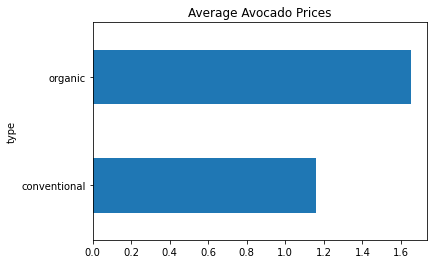

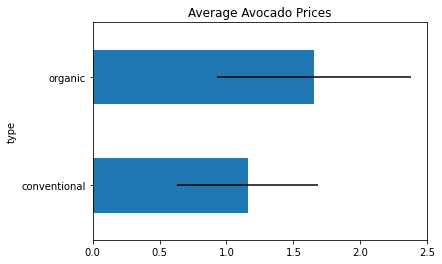

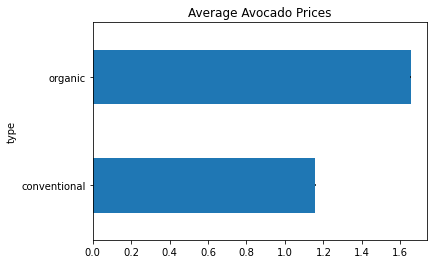

In [10]:
avocado_prices.plot(kind = "barh", y = "mean", legend = False, title = "Average Avocado Prices")

avocado_prices.plot(kind = "barh", y = "mean", legend = False, title = "Average Avocado Prices", xerr = "double_std")

avocado_prices.plot(kind = "barh", y = "mean", legend = False, title = "Average Avocado Prices", xerr = "sem")


<ErrorbarContainer object of 3 artists>

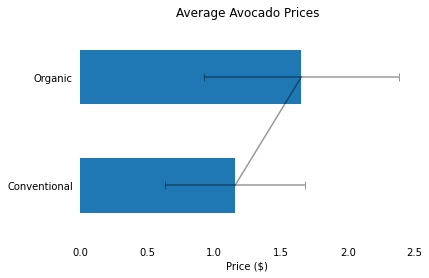

In [16]:
ax = avocado_prices.plot(kind = "barh", y = "mean", legend = False, title = "Average Avocado Prices") #, colors = ["steelblue", "seagreen"]) # no error bars added here
# X
ax.set_xlabel("Price ($)")
# Y
ax.set_ylabel("")
ax.set_yticklabels(["Conventional", "Organic"])

# Overall
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom = False, left = False)
ax.errorbar(avocado_prices["mean"], avocado_prices.index, xerr = avocado_prices["double_std"], 
            linewidth = 1.5, color = "black", alpha = 0.4, capsize = 4)

<ErrorbarContainer object of 3 artists>

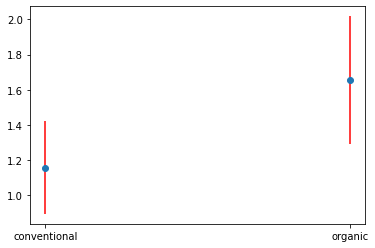

In [29]:
plt.errorbar(avocado_prices.index, avocado_prices["mean"],  yerr = avocado_prices["std"], fmt='o', ecolor='red')# , 

In [17]:
avocado_prices.index

Index(['conventional', 'organic'], dtype='object', name='type')